In [ ]:
!pip install lightgbm optuna
!pip install optuna-integration[lightgbm]
import shap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import optuna
from optuna.integration import LightGBMPruningCallback
import sys

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Senior_Thesis_Waseda/exp_age')

In [ ]:
%run ../evaluation.ipynb
%run ../training.ipynb
%run ../parameter_optimization.ipynb

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Senior_Thesis_Waseda/happiness_data.csv')
df.head()
df.shape

(97220, 82)

In [ ]:
income = pd.read_csv('/content/drive/MyDrive/Senior_Thesis_Waseda/happiness_data_pre_cluster.csv')
income = income.loc[:, ['D_INTERVIEW','X003R']]
income.head()

,D_INTERVIEW,X003R
0,196070011,5
1,196070036,5
2,196070039,3
3,196070040,5
4,196070053,4


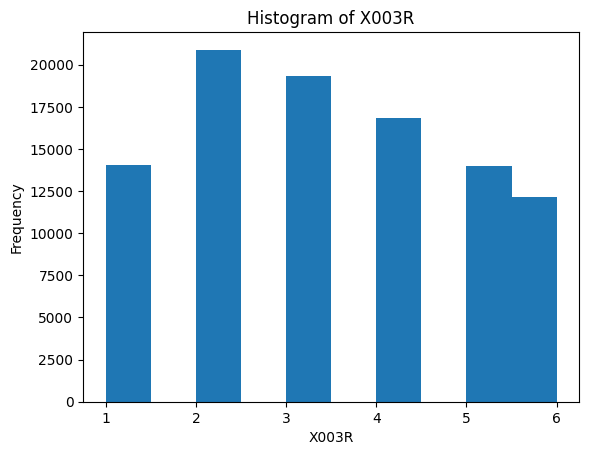

In [ ]:
import matplotlib.pyplot as plt

plt.hist(income['X003R'])
plt.xlabel('X003R')
plt.ylabel('Frequency')
plt.title('Histogram of X003R')
plt.show()

In [ ]:
df_merged = pd.merge(income, df, on='D_INTERVIEW')
df_merged.head()

,D_INTERVIEW,X003R,happiness,B_COUNTRY_ALPHA,G_TOWNSIZE,GDP group,H_SETTLEMENT,Cl_1,Cl_2,Cl_3,...,Cl_67,Cl_68,Cl_69,Cl_70,Cl_71,Cl_72,Cl_73,Cl_74,Cl_75,Cl_76
0,196070011,5,7.333333,CYP,6.0,1,4.0,0.936297,-0.623011,-1.308899,...,-1.675059,0.345000,0.976462,-1.848202,-1.456204,0.884878,2,1,6,3
1,196070036,5,8.000000,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,0.580208,-0.332603,0.976462,-1.218074,-0.272563,0.884878,1,1,8,3
2,196070039,3,8.000000,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,0.574066,0.146194,-0.200705,-0.266231,0.323946,0.268851,1,1,0,3
3,196070040,5,5.333333,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,-0.009851,0.143230,0.976462,-0.742153,-0.272563,0.884878,1,1,8,3
4,196070053,4,4.000000,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,0.507466,-0.300418,0.386842,0.839819,0.915767,0.268851,2,5,8,3


In [ ]:
df_merged = df_merged[df_merged['X003R'] <= 3]
df_merged.head()

,D_INTERVIEW,X003R,happiness,B_COUNTRY_ALPHA,G_TOWNSIZE,GDP group,H_SETTLEMENT,Cl_1,Cl_2,Cl_3,...,Cl_67,Cl_68,Cl_69,Cl_70,Cl_71,Cl_72,Cl_73,Cl_74,Cl_75,Cl_76
2,196070039,3,8.000000,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,0.574066,0.146194,-0.200705,-0.266231,0.323946,0.268851,1,1,0,3
5,196070058,3,7.333333,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,0.253464,-0.376054,0.679133,-0.112024,0.915767,0.884878,1,3,7,3
7,196070069,2,8.000000,CYP,6.0,1,4.0,0.936297,1.605107,0.764001,...,-0.335459,-0.174605,0.976462,-1.218074,-1.456204,0.884878,1,1,5,3
8,196070070,3,7.333333,CYP,6.0,1,4.0,0.936297,-0.623011,0.764001,...,0.321191,-0.332603,0.976462,-1.218074,-0.864383,-0.358720,1,2,8,3
10,196070154,2,8.666667,CYP,7.0,1,1.0,-1.068037,-0.623011,-1.308899,...,-0.999931,0.091762,0.098696,-0.266231,-1.456204,0.884878,1,6,8,3


In [ ]:
categorical = ['Cl_73', 'Cl_74', 'Cl_75', 'Cl_76']

for col in categorical:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [ ]:
X = df_merged.loc[:, 'Cl_1':]
y = df_merged['happiness']

In [ ]:
parameter_optimization(X, y,
    save_path="exp_young_best_params.json")

[I 2025-06-15 18:42:05,411] A new study created in memory with name: lgbm_regression_opt


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.525353
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.528453
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.526123
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.538413
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.525252


[I 2025-06-15 18:46:01,661] Trial 0 finished with value: 0.5287186812331518 and parameters: {'num_leaves': 37, 'learning_rate': 0.059662768998574464, 'max_depth': 12, 'reg_alpha': 0.01689821456403644, 'reg_lambda': 0.008733286960935062, 'feature_fraction': 0.5545578611806954, 'bagging_fraction': 0.7944205512826226, 'bagging_freq': 4, 'min_data_in_leaf': 483}. Best is trial 0 with value: 0.5287186812331518.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.556388
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.563984
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.561036
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.571235
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.562198


[I 2025-06-15 18:50:51,889] Trial 1 finished with value: 0.5629683043142053 and parameters: {'num_leaves': 124, 'learning_rate': 0.008135993077935482, 'max_depth': 11, 'reg_alpha': 0.00016165526881359486, 'reg_lambda': 0.7035409156988579, 'feature_fraction': 0.4019026700531766, 'bagging_fraction': 0.5756856352296862, 'bagging_freq': 5, 'min_data_in_leaf': 459}. Best is trial 0 with value: 0.5287186812331518.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.0143
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.02085
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.02025
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.02173
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.02046


[I 2025-06-15 18:56:10,295] Trial 2 finished with value: 1.0195172568438071 and parameters: {'num_leaves': 59, 'learning_rate': 0.0031419355583659327, 'max_depth': 9, 'reg_alpha': 8.662924996503568, 'reg_lambda': 0.02194583099502228, 'feature_fraction': 0.47397242771581266, 'bagging_fraction': 0.9496188320394634, 'bagging_freq': 7, 'min_data_in_leaf': 153}. Best is trial 0 with value: 0.5287186812331518.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.51615
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.51758
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.52165
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.52468
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.52127


[I 2025-06-15 18:59:08,659] Trial 3 finished with value: 1.5202661209796822 and parameters: {'num_leaves': 88, 'learning_rate': 0.0020393416894354194, 'max_depth': 3, 'reg_alpha': 0.004180382606157517, 'reg_lambda': 9.005175761589022, 'feature_fraction': 0.7078847726835956, 'bagging_fraction': 0.9258973847512997, 'bagging_freq': 1, 'min_data_in_leaf': 156}. Best is trial 0 with value: 0.5287186812331518.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.52107
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.525248
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.520267
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.53361
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.520564


[I 2025-06-15 19:04:55,353] Trial 4 finished with value: 0.5241516766022786 and parameters: {'num_leaves': 81, 'learning_rate': 0.03338461566965746, 'max_depth': 12, 'reg_alpha': 0.009228237972087388, 'reg_lambda': 4.420164028591646, 'feature_fraction': 0.6997672062599631, 'bagging_fraction': 0.8812298141809676, 'bagging_freq': 7, 'min_data_in_leaf': 251}. Best is trial 4 with value: 0.5241516766022786.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.03259
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.03716
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.03877
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.0388
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.03512


[I 2025-06-15 19:10:07,898] Trial 5 finished with value: 1.036488185062156 and parameters: {'num_leaves': 131, 'learning_rate': 0.0035756793567883233, 'max_depth': 6, 'reg_alpha': 0.0003352532574306502, 'reg_lambda': 0.04127989591553768, 'feature_fraction': 0.7891048128108265, 'bagging_fraction': 0.9397669501941917, 'bagging_freq': 1, 'min_data_in_leaf': 169}. Best is trial 4 with value: 0.5241516766022786.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.528355
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.533606
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.530996
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.538888
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.52868


[I 2025-06-15 19:12:54,055] Trial 6 finished with value: 0.5321047381838382 and parameters: {'num_leaves': 30, 'learning_rate': 0.07511737052942642, 'max_depth': 12, 'reg_alpha': 0.0009040884568982261, 'reg_lambda': 5.889870175124454, 'feature_fraction': 0.6664289643882277, 'bagging_fraction': 0.5580546342887509, 'bagging_freq': 5, 'min_data_in_leaf': 200}. Best is trial 4 with value: 0.5241516766022786.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.518607
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.523275
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.519044
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.530599
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.519021


[I 2025-06-15 19:19:48,810] Trial 7 finished with value: 0.5221092064347601 and parameters: {'num_leaves': 149, 'learning_rate': 0.021584729121977998, 'max_depth': 12, 'reg_alpha': 7.376024827825465, 'reg_lambda': 0.0008077586571489891, 'feature_fraction': 0.6648231984664661, 'bagging_fraction': 0.8036760300859622, 'bagging_freq': 5, 'min_data_in_leaf': 204}. Best is trial 7 with value: 0.5221092064347601.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.526453
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.528007
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.528012
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.538524
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.525882


[I 2025-06-15 19:24:45,209] Trial 8 finished with value: 0.529375559742049 and parameters: {'num_leaves': 107, 'learning_rate': 0.027521448316098446, 'max_depth': 10, 'reg_alpha': 0.004026360901338699, 'reg_lambda': 0.000305705563511273, 'feature_fraction': 0.9006505683344346, 'bagging_fraction': 0.4151335109209015, 'bagging_freq': 2, 'min_data_in_leaf': 432}. Best is trial 7 with value: 0.5221092064347601.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.31887
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.32236
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.32328
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.32576
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 1.32505


[I 2025-06-15 19:28:21,004] Trial 9 finished with value: 1.323061709868907 and parameters: {'num_leaves': 26, 'learning_rate': 0.0024446594456802922, 'max_depth': 7, 'reg_alpha': 0.001499402648929466, 'reg_lambda': 0.006244650388242344, 'feature_fraction': 0.4870981102803031, 'bagging_fraction': 0.4813828127928418, 'bagging_freq': 1, 'min_data_in_leaf': 92}. Best is trial 7 with value: 0.5221092064347601.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 19:28:27,999] Trial 10 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.523768
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.526814
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.523055
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.534864
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.523234


[I 2025-06-15 19:33:52,170] Trial 11 finished with value: 0.5263471373318087 and parameters: {'num_leaves': 72, 'learning_rate': 0.028114034068820244, 'max_depth': 9, 'reg_alpha': 0.18049197303944922, 'reg_lambda': 0.34512409552326406, 'feature_fraction': 0.6296645942023187, 'bagging_fraction': 0.819810144023043, 'bagging_freq': 7, 'min_data_in_leaf': 284}. Best is trial 7 with value: 0.5221092064347601.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 19:34:03,160] Trial 12 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 19:34:33,735] Trial 13 pruned. Trial was pruned at iteration 236.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 19:34:43,666] Trial 14 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 19:34:54,674] Trial 15 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.524655
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.526926
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.522618
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.536246
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.525034


[I 2025-06-15 19:40:55,622] Trial 16 finished with value: 0.5270958799670067 and parameters: {'num_leaves': 54, 'learning_rate': 0.04521189109160477, 'max_depth': 10, 'reg_alpha': 0.010061145548751751, 'reg_lambda': 1.7087530489429836, 'feature_fraction': 0.8624086565552432, 'bagging_fraction': 0.9987561539929737, 'bagging_freq': 4, 'min_data_in_leaf': 355}. Best is trial 7 with value: 0.5221092064347601.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 19:41:01,324] Trial 17 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 19:41:14,024] Trial 18 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 19:41:23,472] Trial 19 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 19:41:30,716] Trial 20 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.521966
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.524168
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.52087
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.532797
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.520576


[I 2025-06-15 19:46:35,202] Trial 21 finished with value: 0.5240755504199 and parameters: {'num_leaves': 77, 'learning_rate': 0.039278950418040956, 'max_depth': 9, 'reg_alpha': 0.14154405943530612, 'reg_lambda': 0.2835833892843662, 'feature_fraction': 0.6345014591864532, 'bagging_fraction': 0.7960179725530865, 'bagging_freq': 7, 'min_data_in_leaf': 281}. Best is trial 7 with value: 0.5221092064347601.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.521585
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.523981
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.520294
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.533118
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.522463


[I 2025-06-15 19:51:44,681] Trial 22 finished with value: 0.5242883317619415 and parameters: {'num_leaves': 81, 'learning_rate': 0.04676998078903025, 'max_depth': 12, 'reg_alpha': 0.007933178836437677, 'reg_lambda': 0.217074541962206, 'feature_fraction': 0.7252140483203631, 'bagging_fraction': 0.759508442563944, 'bagging_freq': 7, 'min_data_in_leaf': 209}. Best is trial 7 with value: 0.5221092064347601.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.521903
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.521912
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.520255
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.531643
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[495]	valid's rmse: 0.520997


[I 2025-06-15 19:56:52,284] Trial 23 finished with value: 0.523342232487973 and parameters: {'num_leaves': 91, 'learning_rate': 0.04103250762123793, 'max_depth': 9, 'reg_alpha': 0.029136420576304948, 'reg_lambda': 1.6031421014353249, 'feature_fraction': 0.6714426247822578, 'bagging_fraction': 0.7539027784631227, 'bagging_freq': 6, 'min_data_in_leaf': 314}. Best is trial 7 with value: 0.5221092064347601.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[469]	valid's rmse: 0.519975
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.523485
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.518893
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.532901
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[495]	valid's rmse: 0.519867


[I 2025-06-15 20:01:28,292] Trial 24 finished with value: 0.5230243397437021 and parameters: {'num_leaves': 108, 'learning_rate': 0.06336694819664737, 'max_depth': 9, 'reg_alpha': 3.867755526076228, 'reg_lambda': 0.9348406243708022, 'feature_fraction': 0.51214378803766, 'bagging_fraction': 0.7500665176846019, 'bagging_freq': 6, 'min_data_in_leaf': 316}. Best is trial 7 with value: 0.5221092064347601.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.522868
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.527952
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.522614
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.534515
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.523457


[I 2025-06-15 20:05:12,580] Trial 25 finished with value: 0.526281388138878 and parameters: {'num_leaves': 112, 'learning_rate': 0.0689947499119543, 'max_depth': 7, 'reg_alpha': 3.102862430394538, 'reg_lambda': 1.1012547397820738, 'feature_fraction': 0.5237386913304256, 'bagging_fraction': 0.6473414417901787, 'bagging_freq': 6, 'min_data_in_leaf': 397}. Best is trial 7 with value: 0.5221092064347601.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 20:05:21,368] Trial 26 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[298]	valid's rmse: 0.524731
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[325]	valid's rmse: 0.528496
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[396]	valid's rmse: 0.525102
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[271]	valid's rmse: 0.535195
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[266]	valid's rmse: 0.524614


[I 2025-06-15 20:08:42,892] Trial 27 finished with value: 0.5276276524255664 and parameters: {'num_leaves': 101, 'learning_rate': 0.09727263951888995, 'max_depth': 10, 'reg_alpha': 0.4489930658218551, 'reg_lambda': 0.6979216351910185, 'feature_fraction': 0.5215785828356199, 'bagging_fraction': 0.6742675373732645, 'bagging_freq': 4, 'min_data_in_leaf': 305}. Best is trial 7 with value: 0.5221092064347601.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 20:08:49,051] Trial 28 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.521272
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.522349
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.519578
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.532473
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[487]	valid's rmse: 0.519888


[I 2025-06-15 20:14:06,888] Trial 29 finished with value: 0.5231119295637224 and parameters: {'num_leaves': 89, 'learning_rate': 0.05773555104787926, 'max_depth': 9, 'reg_alpha': 0.016748804018540543, 'reg_lambda': 0.006769296221162642, 'feature_fraction': 0.5666674144463874, 'bagging_fraction': 0.83145617369267, 'bagging_freq': 3, 'min_data_in_leaf': 492}. Best is trial 7 with value: 0.5221092064347601.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.519018
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[497]	valid's rmse: 0.523564
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[493]	valid's rmse: 0.519454
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[491]	valid's rmse: 0.534244
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[477]	valid's rmse: 0.519539


[I 2025-06-15 20:19:43,556] Trial 30 finished with value: 0.5231639956594816 and parameters: {'num_leaves': 117, 'learning_rate': 0.05416760778554196, 'max_depth': 11, 'reg_alpha': 0.02068436492353106, 'reg_lambda': 0.005613260916303199, 'feature_fraction': 0.5276954989256775, 'bagging_fraction': 0.8358762287099257, 'bagging_freq': 3, 'min_data_in_leaf': 484}. Best is trial 7 with value: 0.5221092064347601.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.519667
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[453]	valid's rmse: 0.525097
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[493]	valid's rmse: 0.519157
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[487]	valid's rmse: 0.532198
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[487]	valid's rmse: 0.521137


[I 2025-06-15 20:25:25,441] Trial 31 finished with value: 0.5234514760224387 and parameters: {'num_leaves': 118, 'learning_rate': 0.06560133321203092, 'max_depth': 11, 'reg_alpha': 0.020562720191030094, 'reg_lambda': 0.005834874830062052, 'feature_fraction': 0.5562561434765995, 'bagging_fraction': 0.834583676975722, 'bagging_freq': 3, 'min_data_in_leaf': 499}. Best is trial 7 with value: 0.5221092064347601.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[491]	valid's rmse: 0.517673
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.523141
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.517739
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.530643
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.51772


[I 2025-06-15 20:31:09,632] Trial 32 finished with value: 0.5213831905707602 and parameters: {'num_leaves': 141, 'learning_rate': 0.048758234192987374, 'max_depth': 11, 'reg_alpha': 5.145407036356788, 'reg_lambda': 0.0030106095283359137, 'feature_fraction': 0.5049140143001329, 'bagging_fraction': 0.779845242466242, 'bagging_freq': 2, 'min_data_in_leaf': 480}. Best is trial 32 with value: 0.5213831905707602.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[487]	valid's rmse: 0.518756
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.521586
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.518509
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[493]	valid's rmse: 0.530368
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.519381


[I 2025-06-15 20:36:22,578] Trial 33 finished with value: 0.5217200598342597 and parameters: {'num_leaves': 142, 'learning_rate': 0.05794458677710714, 'max_depth': 10, 'reg_alpha': 4.226718098632613, 'reg_lambda': 0.0019386270388899638, 'feature_fraction': 0.4641678561489423, 'bagging_fraction': 0.7794000144912802, 'bagging_freq': 2, 'min_data_in_leaf': 473}. Best is trial 32 with value: 0.5213831905707602.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[453]	valid's rmse: 0.518662
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.52202
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[497]	valid's rmse: 0.519748
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.53355
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[429]	valid's rmse: 0.520509


[I 2025-06-15 20:41:29,202] Trial 34 finished with value: 0.5228978079229367 and parameters: {'num_leaves': 144, 'learning_rate': 0.07800743487477473, 'max_depth': 11, 'reg_alpha': 8.533857920904037, 'reg_lambda': 0.0007902999823676961, 'feature_fraction': 0.4139909063912787, 'bagging_fraction': 0.7220301880842032, 'bagging_freq': 2, 'min_data_in_leaf': 430}. Best is trial 32 with value: 0.5213831905707602.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[414]	valid's rmse: 0.518852
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[495]	valid's rmse: 0.524588
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[492]	valid's rmse: 0.520664
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[455]	valid's rmse: 0.531828
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[492]	valid's rmse: 0.521959


[I 2025-06-15 20:46:56,954] Trial 35 finished with value: 0.5235781832188169 and parameters: {'num_leaves': 141, 'learning_rate': 0.08543655851225779, 'max_depth': 12, 'reg_alpha': 8.585795463636407, 'reg_lambda': 0.0007455911949203496, 'feature_fraction': 0.4208148897514581, 'bagging_fraction': 0.7837045695395272, 'bagging_freq': 2, 'min_data_in_leaf': 448}. Best is trial 32 with value: 0.5213831905707602.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 20:47:07,322] Trial 36 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 20:47:17,101] Trial 37 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[495]	valid's rmse: 0.517879
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.520284
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.516804
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.530149
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[497]	valid's rmse: 0.518763


[I 2025-06-15 20:51:56,208] Trial 38 finished with value: 0.5207757727550517 and parameters: {'num_leaves': 145, 'learning_rate': 0.050026584363820396, 'max_depth': 12, 'reg_alpha': 4.804746654587884, 'reg_lambda': 0.002840882527496721, 'feature_fraction': 0.48059885875398584, 'bagging_fraction': 0.721688491858073, 'bagging_freq': 1, 'min_data_in_leaf': 457}. Best is trial 38 with value: 0.5207757727550517.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 20:52:05,138] Trial 39 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.516748
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.521192
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.517052
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.529986
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.518677


[I 2025-06-15 20:56:26,824] Trial 40 finished with value: 0.5207308786287987 and parameters: {'num_leaves': 147, 'learning_rate': 0.0485678393270693, 'max_depth': 12, 'reg_alpha': 1.5710772171064276, 'reg_lambda': 0.0001545000618510125, 'feature_fraction': 0.45736097829013145, 'bagging_fraction': 0.5724181656942363, 'bagging_freq': 1, 'min_data_in_leaf': 377}. Best is trial 40 with value: 0.5207308786287987.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 20:56:35,466] Trial 41 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.519041
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[495]	valid's rmse: 0.522811
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.5199
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.53173
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[491]	valid's rmse: 0.518209


[I 2025-06-15 21:00:53,888] Trial 42 finished with value: 0.522338115338956 and parameters: {'num_leaves': 150, 'learning_rate': 0.049977338876683326, 'max_depth': 12, 'reg_alpha': 2.5163054362443984, 'reg_lambda': 0.002376819406895627, 'feature_fraction': 0.49758392555140063, 'bagging_fraction': 0.5173536125417246, 'bagging_freq': 1, 'min_data_in_leaf': 473}. Best is trial 40 with value: 0.5207308786287987.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 21:01:02,485] Trial 43 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 21:01:11,230] Trial 44 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 21:01:18,936] Trial 45 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[477]	valid's rmse: 0.516609
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[494]	valid's rmse: 0.519986
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[497]	valid's rmse: 0.517861
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.529664
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[494]	valid's rmse: 0.517628


[I 2025-06-15 21:05:53,774] Trial 46 finished with value: 0.5203495348807383 and parameters: {'num_leaves': 145, 'learning_rate': 0.038281598527745375, 'max_depth': 11, 'reg_alpha': 0.700380146636038, 'reg_lambda': 0.00022222469257901403, 'feature_fraction': 0.4843223148794932, 'bagging_fraction': 0.45304574298953953, 'bagging_freq': 2, 'min_data_in_leaf': 125}. Best is trial 46 with value: 0.5203495348807383.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[358]	valid's rmse: 0.518487
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[384]	valid's rmse: 0.521893
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[356]	valid's rmse: 0.518876
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[346]	valid's rmse: 0.533642
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[310]	valid's rmse: 0.522759


[I 2025-06-15 21:09:30,636] Trial 47 finished with value: 0.523131511505414 and parameters: {'num_leaves': 143, 'learning_rate': 0.052116612874074764, 'max_depth': 11, 'reg_alpha': 0.2940219622536673, 'reg_lambda': 0.00024236041784448658, 'feature_fraction': 0.4883749710044258, 'bagging_fraction': 0.4855285350751366, 'bagging_freq': 2, 'min_data_in_leaf': 49}. Best is trial 46 with value: 0.5203495348807383.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 21:09:38,693] Trial 48 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[487]	valid's rmse: 0.521091
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[496]	valid's rmse: 0.527096
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.522043
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.53539
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[485]	valid's rmse: 0.524427


[I 2025-06-15 21:13:41,967] Trial 49 finished with value: 0.5260094372543132 and parameters: {'num_leaves': 130, 'learning_rate': 0.07829078472641854, 'max_depth': 11, 'reg_alpha': 1.2992896510246872, 'reg_lambda': 0.0013378828843387488, 'feature_fraction': 0.4370475873282686, 'bagging_fraction': 0.4482425487311465, 'bagging_freq': 2, 'min_data_in_leaf': 474}. Best is trial 46 with value: 0.5203495348807383.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 21:13:51,037] Trial 50 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.514179
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.519521
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.516619
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.527119
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[419]	valid's rmse: 0.517745


[I 2025-06-15 21:20:32,077] Trial 51 finished with value: 0.5190366793502451 and parameters: {'num_leaves': 150, 'learning_rate': 0.04368074054264913, 'max_depth': 12, 'reg_alpha': 2.635366906320119, 'reg_lambda': 0.0003690744769181847, 'feature_fraction': 0.6032327401990496, 'bagging_fraction': 0.8071405694251124, 'bagging_freq': 4, 'min_data_in_leaf': 134}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[487]	valid's rmse: 0.518722
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[487]	valid's rmse: 0.523647
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[492]	valid's rmse: 0.518191
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.529441
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[476]	valid's rmse: 0.518982


[I 2025-06-15 21:25:21,263] Trial 52 finished with value: 0.5217967160166695 and parameters: {'num_leaves': 150, 'learning_rate': 0.044151277558412645, 'max_depth': 11, 'reg_alpha': 2.26718643463527, 'reg_lambda': 0.00039817624667557426, 'feature_fraction': 0.6124993933143583, 'bagging_fraction': 0.44321662737751966, 'bagging_freq': 2, 'min_data_in_leaf': 147}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[484]	valid's rmse: 0.515909
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[360]	valid's rmse: 0.521634
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[481]	valid's rmse: 0.518208
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[362]	valid's rmse: 0.530955
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[339]	valid's rmse: 0.518892


[I 2025-06-15 21:29:44,437] Trial 53 finished with value: 0.521119451130122 and parameters: {'num_leaves': 134, 'learning_rate': 0.058399386933077564, 'max_depth': 12, 'reg_alpha': 0.9430490317387242, 'reg_lambda': 0.00010098290017434526, 'feature_fraction': 0.4719279775034571, 'bagging_fraction': 0.7352242572746959, 'bagging_freq': 3, 'min_data_in_leaf': 90}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[392]	valid's rmse: 0.519936
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[329]	valid's rmse: 0.524819
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[366]	valid's rmse: 0.520739
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[360]	valid's rmse: 0.533575
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[250]	valid's rmse: 0.522616


[I 2025-06-15 21:33:23,094] Trial 54 finished with value: 0.5243368941105039 and parameters: {'num_leaves': 132, 'learning_rate': 0.07100256869764195, 'max_depth': 12, 'reg_alpha': 0.9033157007003458, 'reg_lambda': 0.0001073305271512281, 'feature_fraction': 0.4814882660519772, 'bagging_fraction': 0.7162047260634773, 'bagging_freq': 3, 'min_data_in_leaf': 64}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 21:33:32,872] Trial 55 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 21:33:43,985] Trial 56 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 21:33:55,066] Trial 57 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 21:34:02,434] Trial 58 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[495]	valid's rmse: 0.514397
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[497]	valid's rmse: 0.519945
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.515548
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[407]	valid's rmse: 0.528896
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[431]	valid's rmse: 0.518508


[I 2025-06-15 21:37:56,812] Trial 59 finished with value: 0.519458761340021 and parameters: {'num_leaves': 147, 'learning_rate': 0.050564128739020144, 'max_depth': 11, 'reg_alpha': 5.771714028833438, 'reg_lambda': 0.001063964300364758, 'feature_fraction': 0.43439357397235745, 'bagging_fraction': 0.6252307208345826, 'bagging_freq': 1, 'min_data_in_leaf': 69}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 21:38:05,299] Trial 60 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[497]	valid's rmse: 0.517046
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.520347
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[489]	valid's rmse: 0.517071
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[429]	valid's rmse: 0.530968
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[403]	valid's rmse: 0.517721


[I 2025-06-15 21:42:12,713] Trial 61 finished with value: 0.5206305961151199 and parameters: {'num_leaves': 139, 'learning_rate': 0.05041887720283928, 'max_depth': 11, 'reg_alpha': 0.47115522879593513, 'reg_lambda': 0.0002864502329578238, 'feature_fraction': 0.47249100007040923, 'bagging_fraction': 0.6080356693112868, 'bagging_freq': 1, 'min_data_in_leaf': 183}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[360]	valid's rmse: 0.518404
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[363]	valid's rmse: 0.523295
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[494]	valid's rmse: 0.517873
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[320]	valid's rmse: 0.532834
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[380]	valid's rmse: 0.519942


[I 2025-06-15 21:45:47,436] Trial 62 finished with value: 0.5224698730905133 and parameters: {'num_leaves': 146, 'learning_rate': 0.061469275538356065, 'max_depth': 11, 'reg_alpha': 0.5092272995952302, 'reg_lambda': 0.00030687970249917534, 'feature_fraction': 0.46957660362508735, 'bagging_fraction': 0.633651895967725, 'bagging_freq': 1, 'min_data_in_leaf': 182}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 21:45:53,295] Trial 63 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[171]	valid's rmse: 0.522539
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[165]	valid's rmse: 0.527924
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[207]	valid's rmse: 0.523791
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[213]	valid's rmse: 0.53411
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[181]	valid's rmse: 0.521914


[I 2025-06-15 21:48:06,902] Trial 64 finished with value: 0.5260557092687039 and parameters: {'num_leaves': 147, 'learning_rate': 0.08436900554480907, 'max_depth': 12, 'reg_alpha': 0.0735398601681362, 'reg_lambda': 0.0005316308348502316, 'feature_fraction': 0.5328283562921199, 'bagging_fraction': 0.5714389997783479, 'bagging_freq': 1, 'min_data_in_leaf': 90}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.516922
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[454]	valid's rmse: 0.521546
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[480]	valid's rmse: 0.516501
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid's rmse: 0.530607
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.519711


[I 2025-06-15 21:52:24,716] Trial 65 finished with value: 0.5210574110918482 and parameters: {'num_leaves': 137, 'learning_rate': 0.054377879720984186, 'max_depth': 11, 'reg_alpha': 0.2000563448480109, 'reg_lambda': 0.0002612779745959954, 'feature_fraction': 0.4817706697232512, 'bagging_fraction': 0.6587699489192755, 'bagging_freq': 1, 'min_data_in_leaf': 193}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 21:52:33,552] Trial 66 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[275]	valid's rmse: 0.521047
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[260]	valid's rmse: 0.525658
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[191]	valid's rmse: 0.524471
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[175]	valid's rmse: 0.536427
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[263]	valid's rmse: 0.523463


[I 2025-06-15 21:54:53,433] Trial 67 finished with value: 0.5262133080473769 and parameters: {'num_leaves': 139, 'learning_rate': 0.09934911349081713, 'max_depth': 11, 'reg_alpha': 0.4416203713431891, 'reg_lambda': 0.0010359377769134743, 'feature_fraction': 0.4499484447710191, 'bagging_fraction': 0.6601836618017644, 'bagging_freq': 1, 'min_data_in_leaf': 224}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 21:55:00,920] Trial 68 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 21:55:07,618] Trial 69 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 21:55:44,522] Trial 70 pruned. Trial was pruned at iteration 429.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[373]	valid's rmse: 0.51622
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[374]	valid's rmse: 0.521213
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[416]	valid's rmse: 0.517733
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[374]	valid's rmse: 0.530743
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[477]	valid's rmse: 0.51796


[I 2025-06-15 22:00:36,984] Trial 71 finished with value: 0.5207737769427672 and parameters: {'num_leaves': 134, 'learning_rate': 0.05518456755396059, 'max_depth': 12, 'reg_alpha': 1.0454397240962552, 'reg_lambda': 0.00010549533002962892, 'feature_fraction': 0.472294176610517, 'bagging_fraction': 0.7341027659985981, 'bagging_freq': 2, 'min_data_in_leaf': 183}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:00:45,530] Trial 72 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:00:52,942] Trial 73 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:01:04,649] Trial 74 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:01:10,887] Trial 75 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:01:45,831] Trial 76 pruned. Trial was pruned at iteration 300.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:01:53,732] Trial 77 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:02:01,744] Trial 78 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:02:12,731] Trial 79 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:02:21,094] Trial 80 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[455]	valid's rmse: 0.516148
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[363]	valid's rmse: 0.521374
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[485]	valid's rmse: 0.518166
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	valid's rmse: 0.529667
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[392]	valid's rmse: 0.519248


[I 2025-06-15 22:06:40,573] Trial 81 finished with value: 0.5209203728472732 and parameters: {'num_leaves': 134, 'learning_rate': 0.05771976495297771, 'max_depth': 12, 'reg_alpha': 0.9451803613743294, 'reg_lambda': 0.00010247607260251395, 'feature_fraction': 0.4713821247667918, 'bagging_fraction': 0.7053304611989929, 'bagging_freq': 3, 'min_data_in_leaf': 72}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[373]	valid's rmse: 0.517603
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.52019
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[486]	valid's rmse: 0.51823
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[488]	valid's rmse: 0.530607
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[495]	valid's rmse: 0.520144


[I 2025-06-15 22:10:26,206] Trial 82 finished with value: 0.5213548127113757 and parameters: {'num_leaves': 138, 'learning_rate': 0.0531880559770133, 'max_depth': 12, 'reg_alpha': 0.687227097756935, 'reg_lambda': 0.0001276944295623671, 'feature_fraction': 0.4609701747712532, 'bagging_fraction': 0.6644633759344597, 'bagging_freq': 1, 'min_data_in_leaf': 50}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:11:01,727] Trial 83 pruned. Trial was pruned at iteration 301.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:11:10,918] Trial 84 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:11:18,596] Trial 85 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:11:36,597] Trial 86 pruned. Trial was pruned at iteration 92.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[364]	valid's rmse: 0.518118
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[372]	valid's rmse: 0.522018
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[388]	valid's rmse: 0.519464
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[391]	valid's rmse: 0.532043
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[375]	valid's rmse: 0.520891


[I 2025-06-15 22:16:13,562] Trial 87 finished with value: 0.5225070210407422 and parameters: {'num_leaves': 136, 'learning_rate': 0.06683288194059234, 'max_depth': 12, 'reg_alpha': 1.932909179203306, 'reg_lambda': 0.0002559441340406758, 'feature_fraction': 0.49986000608638337, 'bagging_fraction': 0.6839180042249903, 'bagging_freq': 2, 'min_data_in_leaf': 161}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:16:36,405] Trial 88 pruned. Trial was pruned at iteration 188.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:16:43,833] Trial 89 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:16:52,567] Trial 90 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[437]	valid's rmse: 0.516881
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[414]	valid's rmse: 0.521458
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[493]	valid's rmse: 0.517212
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[390]	valid's rmse: 0.529719
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid's rmse: 0.518792


[I 2025-06-15 22:21:51,683] Trial 91 finished with value: 0.520812292799892 and parameters: {'num_leaves': 135, 'learning_rate': 0.05671284528938494, 'max_depth': 12, 'reg_alpha': 1.0401140100759632, 'reg_lambda': 0.00010783045319505577, 'feature_fraction': 0.47310554664934396, 'bagging_fraction': 0.731024268885073, 'bagging_freq': 3, 'min_data_in_leaf': 97}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[294]	valid's rmse: 0.51982
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[217]	valid's rmse: 0.523396
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[364]	valid's rmse: 0.520417
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[245]	valid's rmse: 0.532869
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[298]	valid's rmse: 0.522471


[I 2025-06-15 22:25:16,540] Trial 92 finished with value: 0.5237946569333692 and parameters: {'num_leaves': 131, 'learning_rate': 0.07816506864658242, 'max_depth': 12, 'reg_alpha': 2.558840364060498, 'reg_lambda': 0.00010339352170249744, 'feature_fraction': 0.44572761395077765, 'bagging_fraction': 0.7237885805326226, 'bagging_freq': 4, 'min_data_in_leaf': 111}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[461]	valid's rmse: 0.516581
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[486]	valid's rmse: 0.520195
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.51485
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[489]	valid's rmse: 0.530834
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 0.517255


[I 2025-06-15 22:30:03,269] Trial 93 finished with value: 0.5199431075504792 and parameters: {'num_leaves': 140, 'learning_rate': 0.05322595086085734, 'max_depth': 11, 'reg_alpha': 4.985145154856474, 'reg_lambda': 0.00020835392677484097, 'feature_fraction': 0.4798352523983159, 'bagging_fraction': 0.7499392206475808, 'bagging_freq': 3, 'min_data_in_leaf': 39}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:30:12,392] Trial 94 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:30:20,785] Trial 95 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[355]	valid's rmse: 0.517313
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[339]	valid's rmse: 0.521876
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[487]	valid's rmse: 0.518953
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[389]	valid's rmse: 0.529301
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[382]	valid's rmse: 0.518776


[I 2025-06-15 22:34:58,826] Trial 96 finished with value: 0.5212437673528887 and parameters: {'num_leaves': 150, 'learning_rate': 0.0697702613420362, 'max_depth': 12, 'reg_alpha': 9.685046319249365, 'reg_lambda': 0.00013346560887771437, 'feature_fraction': 0.4699164252696558, 'bagging_fraction': 0.7385008678006262, 'bagging_freq': 4, 'min_data_in_leaf': 98}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:35:09,701] Trial 97 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[424]	valid's rmse: 0.515869
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[425]	valid's rmse: 0.521417
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[397]	valid's rmse: 0.518281
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[368]	valid's rmse: 0.530738
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[439]	valid's rmse: 0.518016


[I 2025-06-15 22:39:45,757] Trial 98 finished with value: 0.5208641075310722 and parameters: {'num_leaves': 145, 'learning_rate': 0.05860834862069764, 'max_depth': 10, 'reg_alpha': 1.749638060686074, 'reg_lambda': 0.025572245143320328, 'feature_fraction': 0.41257027848006, 'bagging_fraction': 0.7168558654791006, 'bagging_freq': 3, 'min_data_in_leaf': 95}. Best is trial 51 with value: 0.5190366793502451.


Training until validation scores don't improve for 50 rounds


[I 2025-06-15 22:39:52,797] Trial 99 pruned. Trial was pruned at iteration 50.


In [ ]:
model, test_rmse= training(X, y,
    params_json_path="exp_young_best_params.json",
    save_model_path='exp_young_model.txt',
    save_log_filename="exp_young_log.csv")

Training until validation scores don't improve for 50 rounds
[50]	valid's rmse: 0.658716	valid's l2: 0.433907
[100]	valid's rmse: 0.553431	valid's l2: 0.306286
[150]	valid's rmse: 0.541458	valid's l2: 0.293177
[200]	valid's rmse: 0.537201	valid's l2: 0.288585
[250]	valid's rmse: 0.535297	valid's l2: 0.286543
[300]	valid's rmse: 0.534268	valid's l2: 0.285443
[350]	valid's rmse: 0.53342	valid's l2: 0.284537
[400]	valid's rmse: 0.532988	valid's l2: 0.284076
[450]	valid's rmse: 0.532798	valid's l2: 0.283874
[500]	valid's rmse: 0.532839	valid's l2: 0.283917
Early stopping, best iteration is:
[475]	valid's rmse: 0.532658	valid's l2: 0.283725


In [ ]:
# Compute the standard deviation of y
std_y = y.std()
print(f"The standard deviation of y is: {std_y}")

In [ ]:
evaluation(model,
    X.sample(10000),
    name = "exp_young_results",
    max_display=30)

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>